### Importación de datos



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


# INFORME FINAL
bueno a mi parecer juan deberia de vende la **tienda 1**, por que? bien, aunque sea la mejor que factura. igualmente tiene la calificacion mas baja (3.98). tambien el costo de envio es alto.


#1. Análisis de facturación



en cada uno de los cosos de la tienda, sumar la columna precio para saber cuanto facturo esa tienda.

In [28]:
ingreso_tienda1 = tienda1["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

In [29]:
# un dicionario, nada nuevo. clave=nombre de la tienda, valor=total de ingresos
ingresos = {
    "tienda1": ingreso_tienda1,
    "tienda2": ingreso_tienda2,
    "tienda3": ingreso_tienda3,
    "tienda4": ingreso_tienda4
}
# crea un dataFrame (pandas) y usa columnas y filas
df_ingresos = pd.DataFrame.from_dict(ingresos, orient="index", columns=["ingresos"])
ingresos

# por que el resultado se ve asi? no llores anto esta bien hecho. explicacion:
# el np.float64() es el tipo de dato.
#"float": numero con decimales  "64": usa 64 bits para representarlo (mayor precision)

{'tienda1': np.float64(1150880400.0),
 'tienda2': np.float64(1116343500.0),
 'tienda3': np.float64(1098019600.0),
 'tienda4': np.float64(1038375700.0)}

In [30]:
# ordena las tiendas de mayor ingresos a menor
df_ingresos.sort_values(by="ingresos", ascending=False)

# por que el resultado se ve haci? explicacion:
# es solo notacion cientifica, osea 1,15*9, se usa cuando son numeros muuy grades.

,ingresos
tienda1,"1,150,880,400.00"
tienda2,"1,116,343,500.00"
tienda3,"1,098,019,600.00"
tienda4,"1,038,375,700.00"


In [31]:
# como no me gusta como se ve el resultado con la notacion cientifica, lo vamos a cambiar:
pd.options.display.float_format="{:,.2f}".format
df_ingresos.sort_values(by="ingresos", ascending=False)

,ingresos
tienda1,"1,150,880,400.00"
tienda2,"1,116,343,500.00"
tienda3,"1,098,019,600.00"
tienda4,"1,038,375,700.00"


# 2. Ventas por categoría

Tenemos que buscar: que esta comprando mas la gente?

In [32]:
# crear un dicionario con todas las tiendas
tiendas = {
    "tienda1": tienda1,
    "tienda2": tienda2,
    "tienda3": tienda3,
    "tienda4": tienda4
}

In [33]:
# limpiar por si tiene espacios en blanco, POR QUEME SIGUE DANDO ERROR SI ALGUIEN LEE ESTO, ESTOY HACE UNA HORA!!!
for tienda in tiendas.values():
    tienda.columns = tienda.columns.str.strip()

In [34]:
# recorrer las tiendas con un for.
for nombre, df in tiendas.items():
    print(f"Procesando {nombre}")  # Esto está dentro del for, porque o sino no funca!
    ventas_cat = df.groupby("Categoría del Producto").size().reset_index(name="Ventas")
    print(ventas_cat.head())  # ESTO también debe estar dentro del for


Procesando tienda1
    Categoría del Producto  Ventas
0  Artículos para el hogar     171
1     Deportes y diversión     284
2        Electrodomésticos     312
3             Electrónicos     448
4   Instrumentos musicales     182
Procesando tienda2
    Categoría del Producto  Ventas
0  Artículos para el hogar     181
1     Deportes y diversión     275
2        Electrodomésticos     305
3             Electrónicos     422
4   Instrumentos musicales     224
Procesando tienda3
    Categoría del Producto  Ventas
0  Artículos para el hogar     177
1     Deportes y diversión     277
2        Electrodomésticos     278
3             Electrónicos     451
4   Instrumentos musicales     177
Procesando tienda4
    Categoría del Producto  Ventas
0  Artículos para el hogar     201
1     Deportes y diversión     277
2        Electrodomésticos     254
3             Electrónicos     451
4   Instrumentos musicales     170


conclusion: la categoria mas vendida es Electrónicos!

# 3. Calificación promedio de la tienda


calcular la calificacion promedio de los clientes por tienda, usamos la columna Calificacion

In [35]:
calificaciones= {}

for nombre, df in tiendas.items():
  df.columns= df.columns.str.strip() #limpiamos por si acaso, mira yo ya no confio en nadie y nada.
  promedio = df["Calificación"].mean()
  calificaciones[nombre] = promedio

In [36]:
df_calificaciones = df_calificaciones= pd.DataFrame.from_dict(calificaciones, orient="index", columns=["calificacion promedio"])
df_calificaciones = df_calificaciones.sort_values(by="calificacion promedio", ascending=False)
df_calificaciones

,calificacion promedio
tienda3,4.05
tienda2,4.04
tienda4,4.00
tienda1,3.98


In [37]:
pd.options.display.float_format="{:,.2f}".format
df_calificaciones

,calificacion promedio
tienda3,4.05
tienda2,4.04
tienda4,4.00
tienda1,3.98


# 4. Productos más y menos vendidos

encontar los productos mas vendidos y los menos vendidos de cada tienda, usando la columna producto

In [38]:

# for para recorrer todas las tiendas, analizando los productos por tiendas

for nombre, df in tiendas.items():
  df.columns= df.columns.str.strip()#limpiar
  print(f"\nProcesando {nombre}") #nombre de la tienda

  productos= df["Producto"].value_counts()

  print("\nproductos mas vendidos")
  print(productos.head(5))


Procesando tienda1

productos mas vendidos
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Procesando tienda2

productos mas vendidos
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Procesando tienda3

productos mas vendidos
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Procesando tienda4

productos mas vendidos
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64


In [39]:
for nombre, df in tiendas.items():
  df.columns= df.columns.str.strip()#limpiar
  print(f"\nProcesando {nombre}") #nombre de la tienda

  productos= df["Producto"].value_counts()

  print("\nProductos menos vendidos:")
  print(productos.sort_values().head(5)) # sort_values() ordena de menor a mayor


Procesando tienda1

Productos menos vendidos:
Producto
Auriculares con micrófono    33
Celular ABXY                 33
Olla de presión              35
Pandereta                    36
Mochila                      39
Name: count, dtype: int64

Procesando tienda2

Productos menos vendidos:
Producto
Juego de mesa      32
Mesa de comedor    34
Impresora          34
Sillón             35
Auriculares        37
Name: count, dtype: int64

Procesando tienda3

Productos menos vendidos:
Producto
Bloques de construcción    35
Microondas                 36
Set de vasos               36
Mochila                    36
Vaso térmico               38
Name: count, dtype: int64

Procesando tienda4

Productos menos vendidos:
Producto
Guitarra eléctrica             33
Armario                        34
Guitarra acústica              37
Ciencia de datos con Python    38
Lavadora de ropa               38
Name: count, dtype: int64


In [40]:
# conclusion: (mas vendidos, menos vendidos)
# tienda1 (Microondas 60, Auriculares con micrófono 33)
# tienda2 (Iniciando en programación 65, Juego de mesa 32)
# tienda3 (Kit de bancas 57, Bloques de construcción 35)
# tienda4 (Cama box 62, Guitarra eléctrica 33)

# 5. Envío promedio por tienda

colunma= Costos de envio. sacar el promedio del costo de envio por cada tienda.

In [41]:
envios={}
# lo mismo que hice para crear el promedio para la calificaciones pero aca.
for nombre, df in tiendas.items():
  df.columns = df.columns.str.strip()#limpieza porsi
  promedio_envio = df["Costo de envío"].mean()
  envios[nombre]= promedio_envio

In [42]:
# crear el dataframe, porque aun no esta creado
df_envios = pd.DataFrame.from_dict(envios, orient="index", columns=["Costo de envío"])
df_envios= df_envios.sort_values(by="Costo de envío", ascending= True)

df_envios

,Costo de envío
tienda4,"23,459.46"
tienda3,"24,805.68"
tienda2,"25,216.24"
tienda1,"26,018.61"


# Sección nueva Graficos

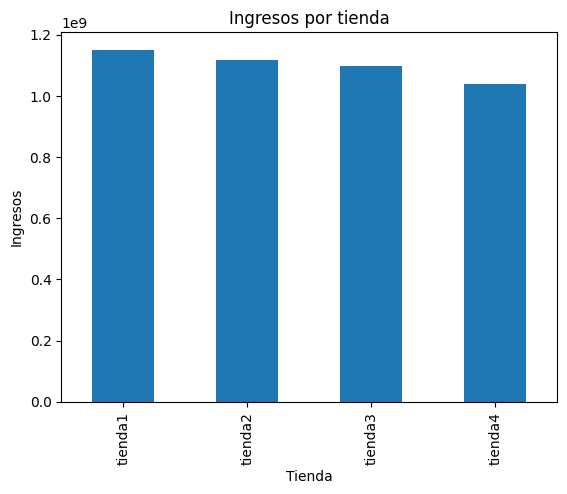

In [43]:
df_ingresos.plot(kind="bar", legend=False)
plt.title("Ingresos por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos")
plt.show()

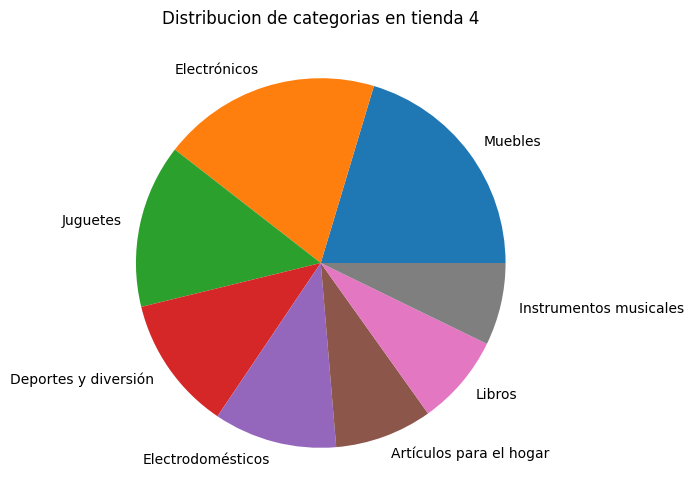

In [45]:
categorias = tienda4 ["Categoría del Producto"].value_counts()

categorias.plot(kind="pie", figsize=(6,6))
plt.title("Distribucion de categorias en tienda 4")
plt.ylabel("")
plt.show()

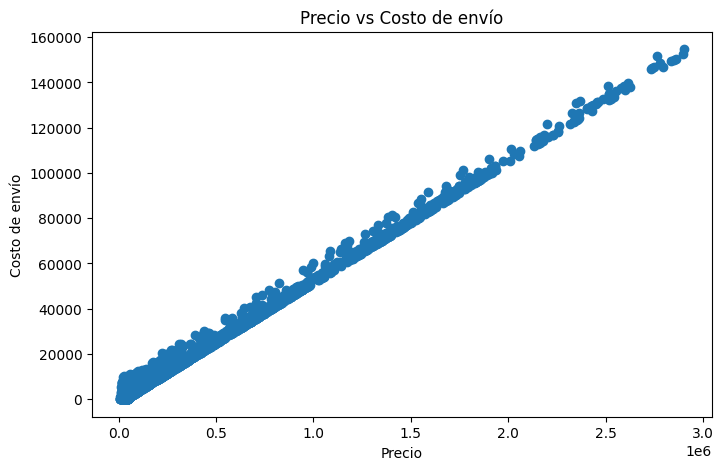

In [50]:
plt.figure(figsize=(8,5))
plt.scatter(tienda4["Precio"], tienda4["Costo de envío"])
plt.title("Precio vs Costo de envío")
plt.xlabel("Precio")
plt.ylabel("Costo de envío")
plt.show()